In [10]:
import numpy as np
from PIL import Image
import matplotlib as mp
import matplotlib.pyplot as plt
import random as rd

# Algo Efros Leung

## Init

In [11]:
# Function definitions
def extract(npimg, x, y, size):
    demi = (size // 2)
    return npimg[(x - demi):(x + demi+1), (y - demi):(y + demi + 1)]

def createTargetNPImage(sizex,sizey):
    # fill an array with -1 with dimension sizex,sizey,3
    tab = np.zeros([sizex,sizey,3])
    tab.fill(-1)
    return tab

def fillTargetCenter(npimg,patch):
    npimg[(npimg.shape[0] // 2 - patch.shape[0] // 2):(npimg.shape[0] // 2 + patch.shape[0] // 2 + 1), (npimg.shape[1] // 2 - patch.shape[1] // 2):(npimg.shape[1] // 2 + patch.shape[1] // 2 + 1)] = patch/255
    return npimg

def pixelScore(npimg,x,y,patch_size):
    demi=patch_size//2
    sum = 0
    for i in range(x-demi,x+demi+1):
        for j in range(y-demi,y+demi+1):
            if i >= 0 and i < npimg.shape[0] and j >= 0 and j < npimg.shape[1] and npimg[i,j,0] != -1:
                sum += 1
    return sum

def imgScore(npimg,patch_size):
    bests = []
    bestScore = 0
    for i in range(0, npimg.shape[0]):
        for j in range(0, npimg.shape[1]):
            if npimg[i,j,0] == -1:
                score = pixelScore(npimg,i,j,patch_size)
                if score == bestScore:
                    bests.append((i,j))
                elif score > bestScore:
                    bests = [(i,j)]
                    bestScore = score
    return bests

def pickPixelToColor(npimg,patch_size):
    bests = imgScore(npimg,patch_size)
    return rd.choice(bests)

def colorDistance(c1,c2):
    score = 0
    for i in range(0,3):
        score += (c1[i]-c2[i])**2
    return score
    

def selectPatch(texture,patch_size, img, x, y):
    minDist = 100000000000
    minPos = (-1,-1)
    demi = patch_size//2
    for i in range(demi, texture.shape[0] - demi - 1):
        for j in range(demi, texture.shape[1] - demi - 1):
            sum = 0
            for k in range(-demi,demi):
                for l in range(-demi,demi):
                    nx = i+k
                    ny = j+l
                    
                    if nx >= 0 and nx < img.shape[0] and ny >= 0 and ny < img.shape[1] and img[nx,ny,0] != -1:
                        sum += colorDistance(texture[nx,ny],img[nx,ny])
            if sum < minDist:
                minDist = sum
                minPos = (i,j)
    return minPos
        
            
def fillPixel(npimg, x, y, color):
    npimg[x,y] = color/255
    return npimg





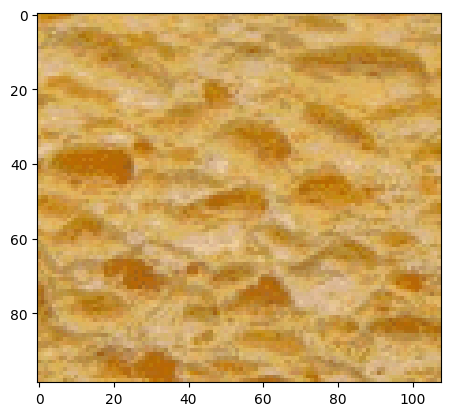

In [12]:
img = Image.open("text1.png")
npimg = np.array(img)
size = 21
patch = extract(npimg, rd.randrange(size // 2, img.width - size //2 - 1), 10, 11)
plt.imshow(npimg)

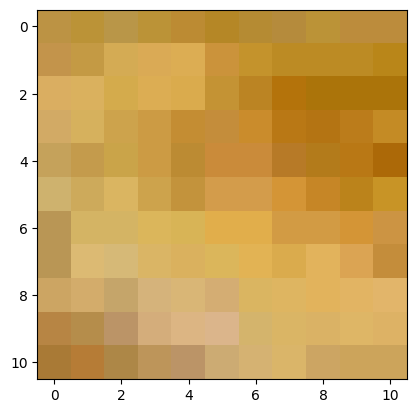

In [13]:
plt.imshow(patch)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


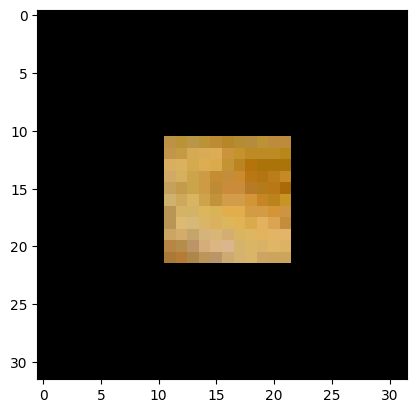

In [14]:
# Create target image
target = createTargetNPImage(32, 32)
target = fillTargetCenter(target, patch)
plt.imshow(target)


## Phase 2: Boucle

In [15]:
for i in range(0, 1000):
    x, y = pickPixelToColor(target, patch.shape[0])
    #print(x,y)

    #target[x,y] = (255,0,0)

    px, py = selectPatch(npimg, patch.shape[0], target, x, y)
    #print(px,py)
    #print(npimg[px,py])

    target = fillPixel(target, x, y, npimg[px,py])


plt.imshow(target)
